# Introduction
 
 I am analyzing a Top 1000 trending youtube videos dataset from the data source '../data/top-1000-trending-youtube-videos' which is originally from Kaggle and contains about list of videos trending on youtube including the number of views, likes, dislikes, category and published year.

In this analysis, I am gonna explore towards answering below key points.

1. Which videos received the most views on Youtube?
2. What is the distribution of likes across different categories?
3. How do the total number of videos compare across categories?
4. What is the trend of video uploads over the years?
5. what is the distribution of video categories?
6. What is the Trend of video uploaded based on categories over the years?







In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [239]:
df = pd.read_csv('../data/top-1000-trending-youtube-videos.csv')
df.rename(lambda col: col.replace('\xa0', ' '), axis='columns', inplace=True) 
df.head()

,rank,Video,Video views,Likes,Dislikes,Category,published
0,1,"20 Tennis shots if they were not filmed, NOBOD...","3,471,237","19,023",859,NaN,2017
1,2,Lil Nas X - Old Town Road (Official Movie) ft....,"54,071,677","3,497,955","78,799",Music,2019
2,3,JoJo Siwa - Karma (Official Video),"34,206,747","293,563",NaN,Music,2024
3,4,Wiz Khalifa - See You Again ft. Charlie Puth [...,"6,643,904,918","44,861,602",NaN,Music,2015
4,5,伊賀の天然水強炭酸水「家族で、シュワシェア。」篇 15秒,"236,085,971",38,NaN,NaN,2021


In [240]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Video        1000 non-null   object
 2   Video views  1000 non-null   object
 3   Likes        973 non-null    object
 4   Dislikes     687 non-null    object
 5   Category     820 non-null    object
 6   published    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


,rank,Video,Video views,Likes,Dislikes,Category,published
count,1000.000000,1000,1000,973,687,820,1000.000000
unique,NaN,994,1000,843,489,15,NaN
top,NaN,Aydem Enerji - Hayat için enerji,"3,471,237",2,0,Music,NaN
freq,NaN,2,1,15,33,284,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,2015.933000
std,288.819436,NaN,NaN,NaN,NaN,NaN,6.054847
min,1.000000,NaN,NaN,NaN,NaN,NaN,2005.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,2010.000000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,2017.000000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,2021.000000


In [241]:
df.columns = df.columns.str.title()
df.head()

,Rank,Video,Video Views,Likes,Dislikes,Category,Published
0,1,"20 Tennis shots if they were not filmed, NOBOD...","3,471,237","19,023",859,NaN,2017
1,2,Lil Nas X - Old Town Road (Official Movie) ft....,"54,071,677","3,497,955","78,799",Music,2019
2,3,JoJo Siwa - Karma (Official Video),"34,206,747","293,563",NaN,Music,2024
3,4,Wiz Khalifa - See You Again ft. Charlie Puth [...,"6,643,904,918","44,861,602",NaN,Music,2015
4,5,伊賀の天然水強炭酸水「家族で、シュワシェア。」篇 15秒,"236,085,971",38,NaN,NaN,2021


In [242]:
df['Video Views'] = pd.to_numeric(df['Video Views'].replace({r',': ''}, regex=True), errors='coerce')
df['Likes'] = pd.to_numeric(df['Likes'].replace({r',': ''}, regex=True), errors='coerce')
df['Dislikes'] = pd.to_numeric(df['Dislikes'].replace({r',': ''}, regex=True), errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         1000 non-null   int64  
 1   Video        1000 non-null   object 
 2   Video Views  1000 non-null   int64  
 3   Likes        973 non-null    float64
 4   Dislikes     687 non-null    float64
 5   Category     820 non-null    object 
 6   Published    1000 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [243]:
missing_values = df.isna().sum()
print(missing_values[missing_values > 0])

Likes        27
Dislikes    313
Category    180
dtype: int64


In [244]:
df['Likes'] = df['Likes'].fillna(df['Likes'].mean())
df['Dislikes'] = df['Dislikes'].fillna(df['Dislikes'].mean())
df['Category'] = df['Category'].fillna('Unknown')

In [245]:
df['Video Views'] = df['Video Views'].astype(int)
df['Likes'] = df['Likes'].astype(int)
df['Dislikes'] = df['Dislikes'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         1000 non-null   int64 
 1   Video        1000 non-null   object
 2   Video Views  1000 non-null   int64 
 3   Likes        1000 non-null   int64 
 4   Dislikes     1000 non-null   int64 
 5   Category     1000 non-null   object
 6   Published    1000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 54.8+ KB


In [246]:
df.to_csv('cleaned_top_1000_youtube_video_data.csv', index=False)

/var/folders/vx/3c_f9mjj19l20pbxwvg8l2040000gp/T/ipykernel_56573/2586836715.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Views in Million', y='Video', data=most_viewed_video, palette='viridis')


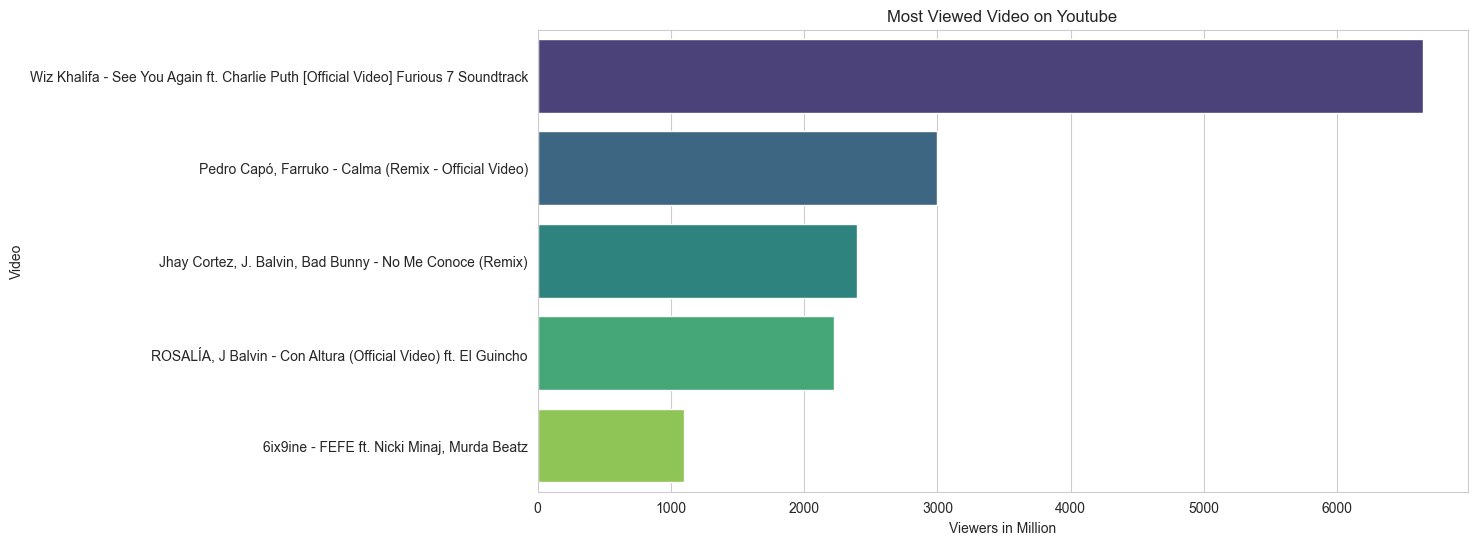

In [247]:
df1 = df.copy()
df1['Views in Million'] = df1['Video Views'] / 1000000
most_viewed_video = df1.sort_values('Views in Million', ascending=False).head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x='Views in Million', y='Video', data=most_viewed_video, palette='viridis')
plt.title('Most Viewed Video on Youtube')
plt.xlabel('Viewers in Million')
plt.ylabel('Video')
plt.show()

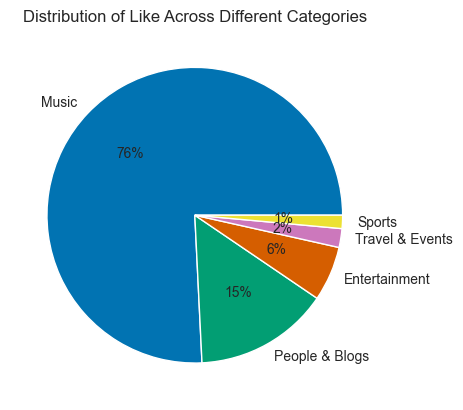

In [299]:
likes_by_category = df.groupby('Category')['Likes'].sum().sort_values(ascending=False).head(5)

palette_color = sns.color_palette('colorblind6') 
plt.pie(likes_by_category.values, labels=likes_by_category.index, colors=palette_color, autopct='%.0f%%')
plt.title('Distribution of Like Across Different Categories')
plt.show()

/var/folders/vx/3c_f9mjj19l20pbxwvg8l2040000gp/T/ipykernel_56573/3142684389.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Category'], order=df['Category'].value_counts(ascending=False).index,  palette='muted')


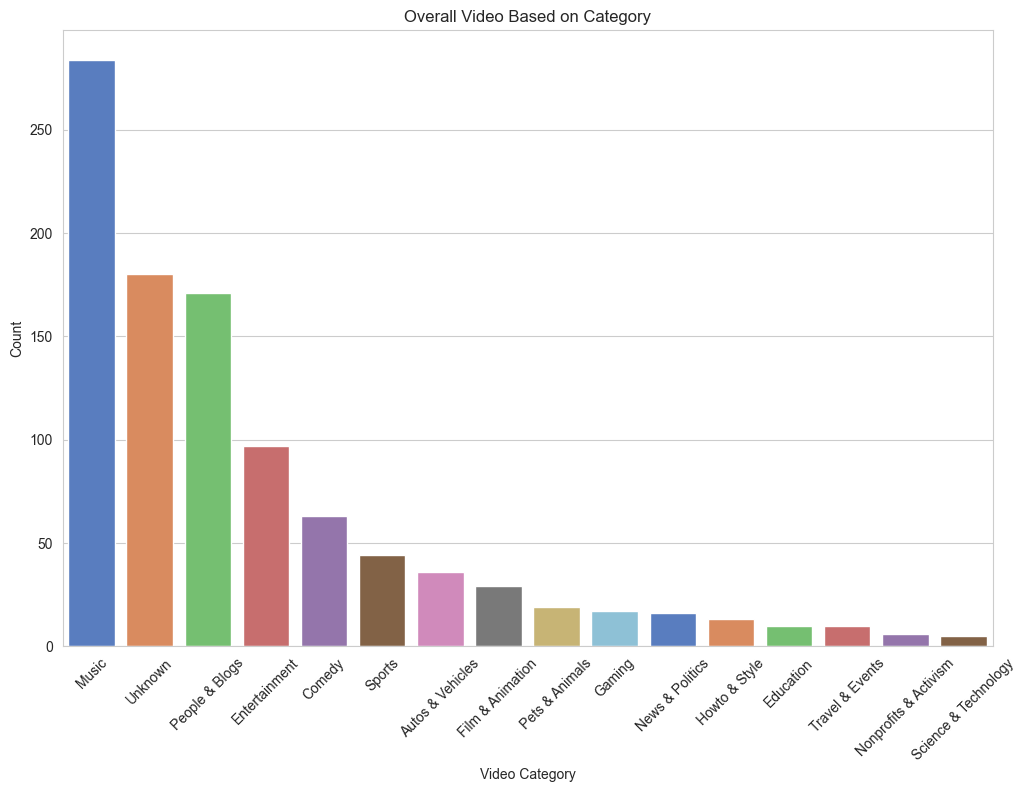

In [306]:
plt.figure(figsize=(12, 8))
sns.countplot(x=df['Category'], order=df['Category'].value_counts(ascending=False).index,  palette='muted')
plt.title('Overall Video Based on Category')
plt.xlabel('Video Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

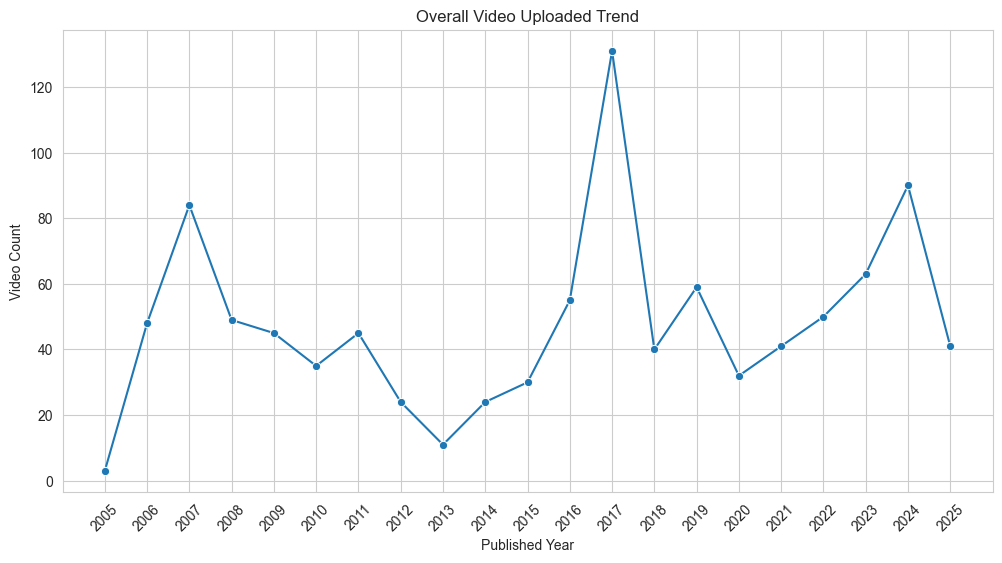

In [262]:
video_trend_per_year = df['Published'].value_counts()

plt.figure(figsize=(12, 6))
sns.lineplot(x=video_trend_per_year.index, y=video_trend_per_year.values, marker='o')
plt.xticks(ticks=video_trend_per_year.index, rotation=45)
plt.title('Overall Video Uploaded Trend')
plt.xlabel('Published Year')
plt.ylabel('Video Count')
plt.show()


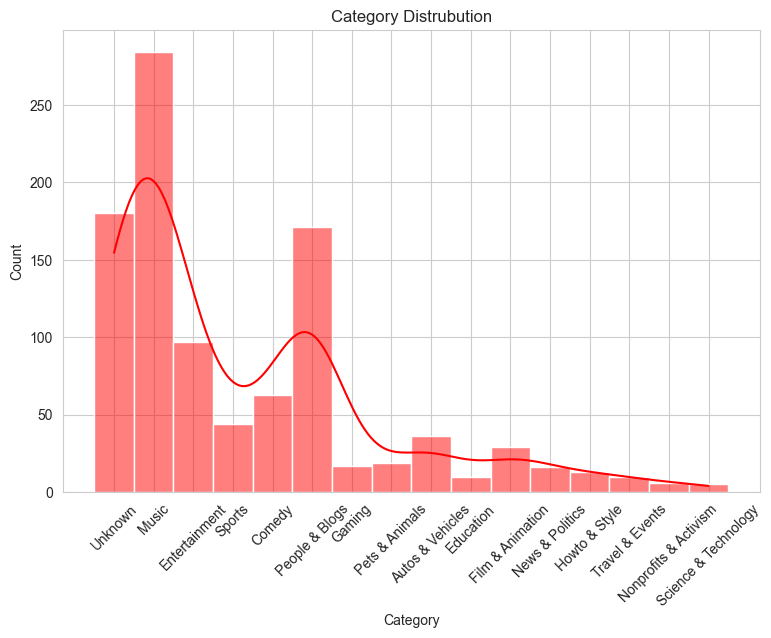

In [305]:
plt.figure(figsize=(9, 6))
sns.histplot(df['Category'], bins=5, kde=True, color='red')
plt.title('Category Distrubution')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

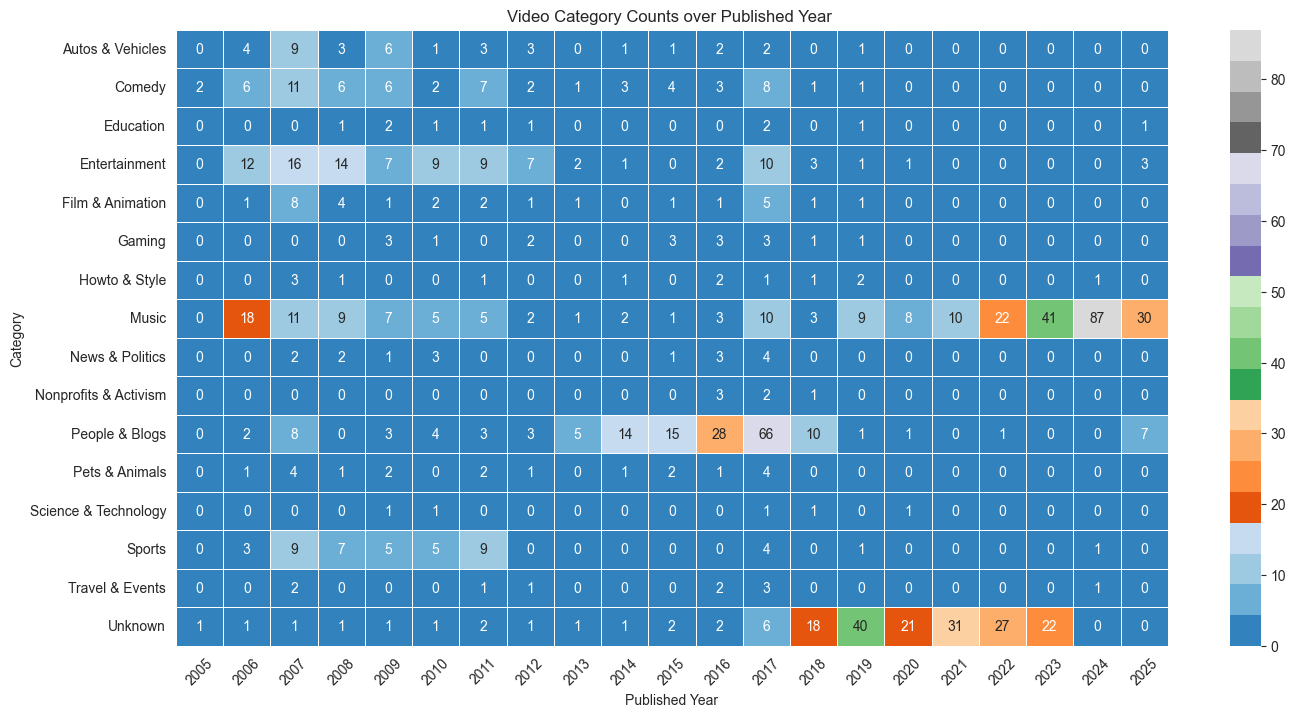

In [314]:
data = df.pivot_table(index='Category', columns='Published', values='Video', aggfunc='count', fill_value=0)

plt.figure(figsize=(16, 8))
sns.heatmap(data, cmap='tab20c', annot=True, linewidths=0.5)
plt.xticks(rotation=45)
plt.title('Video Category Counts over Published Year ')
plt.xlabel('Published Year')
plt.ylabel('Category')

plt.show()

### Conclusion

This analysis of the Top 1000 trending Youtube videos revealed the following key findings:
- Most Viewed Videos: See you again by Wiz Khalifa which is Music Category.
- Like Distribution: The Music Category got the most likes, followed by People & Blogs, Entertainment.
- Video Category Distribution: Category Music got the most videos, followed by unknown, People & Blogs, and Entertainment.
- Video Upload Trend Over the Years: the highest number of trending videos were uploaded in 2017, with a noticable decline in recent years.
- Category Trends Over Time: Heatmap analysis showed category popularity changes over the years.

### Important Consideration
- The dataset represents only the top 1000 trending videos, which may not be reflect all Youtube content.
- The analysis focuss on quantitative data without considering video content or quality. 

### Future Analysis Possibilities
Based on the current analysis, the folllowing areas can be explored for further analysis to gain deeper insights into Youtube Data.
- Video Duration: Explore how video length affects views, likes and dislikes.
- Seasonal Trends: Check if certain events or seasons impact video views and uploads.
- Creater Influence: Investigate how a creater's popularity affects video likes, dislikes and views.

